In [1]:
import scipy.linalg
import scipy.optimize
import sys
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu
import time
from tqdm import tqdm

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
def drop_points_filtering(file_name_path, param):
    number_points_input = []
    number_points_out_outliers = []
    number_points_out_filters_only = []
    number_points_out_filters = []
    
    for i in file_name_path:
        print(i)
        
        t1, t2, t3, tp1, tp2, tp3, d1, d2, d3, a1, a2, a3, e1, e2, e3 = ttfu.read_rosbag_theodolite_without_tf_raw_data_pre_filtered(i)
        index_1_f = ttfu.thresold_raw_data(t1, d1, a1, e1, param[0], param[1]*3.1415926/180, param[2]*3.1415926/180, param[3])
        index_2_f = ttfu.thresold_raw_data(t2, d2, a2, e2, param[0], param[1]*3.1415926/180, param[2]*3.1415926/180, param[3])
        index_3_f = ttfu.thresold_raw_data(t3, d3, a3, e3, param[0], param[1]*3.1415926/180, param[2]*3.1415926/180, param[3])
        t1 = t1[index_1_f]
        t2 = t2[index_2_f]
        t3 = t3[index_3_f]
        tp1 = tp1[index_1_f].T
        tp2 = tp2[index_2_f].T
        tp3 = tp3[index_3_f].T

        tr1, tr2, tr3, trp1, trp2, trp3, d1, d2, d3, a1, a2, a3, e1, e2, e3 = ttfu.read_rosbag_theodolite_without_tf_raw_data(i)

        sum_input_points = len(tr1)+len(tr2)+len(tr3)
        sum_outliers_points = len(t1)+len(t2)+len(t3)
        
        list_interval, list_time = tfu.split_time_interval_all_data(t1, t2, t3, param[3])
        list_trajectories_split = tfu.merge_interval(list_interval, list_time, t1, t2, t3, param[3])
        
        sum_filters_points = 0
        
        for j in tqdm(list_trajectories_split):
            index_1 = np.array([j[0,0],j[1,0]])
            index_2 = np.array([j[0,1],j[1,1]])
            index_3 = np.array([j[0,2],j[1,2]])
            
            sum_filters_points = sum_filters_points + len(t1[index_1[0]:index_1[1]]) + len(t2[index_2[0]:index_2[1]]) + len(t3[index_3[0]:index_3[1]])
            
        list_interval, list_time = tfu.split_time_interval_all_data(tr1, tr2, tr3, param[3])
        list_trajectories_split = tfu.merge_interval(list_interval, list_time, tr1, tr2, tr3, param[3])
        
        sum_filters_points_only = 0
        
        for j in tqdm(list_trajectories_split):
            index_1 = np.array([j[0,0],j[1,0]])
            index_2 = np.array([j[0,1],j[1,1]])
            index_3 = np.array([j[0,2],j[1,2]])
            
            sum_filters_points_only = sum_filters_points_only + len(t1[index_1[0]:index_1[1]]) + len(t2[index_2[0]:index_2[1]]) + len(t3[index_3[0]:index_3[1]])


        number_points_input.append(sum_input_points)
        number_points_out_outliers.append(sum_outliers_points)
        number_points_out_filters.append(sum_filters_points)
        number_points_out_filters_only.append(sum_filters_points_only)

    print("Results done !")
    
    return number_points_input, number_points_out_outliers, number_points_out_filters, number_points_out_filters_only

In [37]:
file = ["/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag",
        "/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag",
        "/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag",
        "/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag",
        "/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag",
        "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag",
        "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag",
        "/home/norlab/Data/IROS_2022/20220427_TS/2022-04-27-12-12-10_filered.bag",
        "/home/norlab/Data/IROS_2022/20220505_TS/empty1_2022-05-05-19-14-33.bag",
        "/home/norlab/Data/IROS_2022/20220505_TS/cones1_2022-05-05-19-25-54.bag"]

param = [np.array([1, 10, 10, 1]),
         np.array([1.5, 10, 10, 1]),
         np.array([2, 10, 10, 1]),
         np.array([2.5, 10, 10, 1])]

In [38]:
mean_points_input = []
mean_point_out_outlier = []
mean_point_out_filter = []
mean_point_out_filter_only = []
for i in param:
    number_points_input, number_points_out_outliers, number_points_out_filters, number_points_out_filters_only = drop_points_filtering(file, i)
    mean_points_input.append(np.sum(number_points_input))
    mean_point_out_outlier.append(np.sum(number_points_out_outliers))
    mean_point_out_filter.append(np.sum(number_points_out_filters))
    mean_point_out_filter_only.append(np.sum(number_points_out_filters_only))
    

/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag
Number of data for theodolites: [4945 4681 4737]
Bad measures: 558
Number of data for theodolites: [4945 4681 4737]
Bad measures: 558


100%|██████████| 199/199 [00:00<00:00, 195609.68it/s]


/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag
Number of data for theodolites: [7292 6861 7123]
Bad measures: 556
Number of data for theodolites: [7292 6861 7123]
Bad measures: 556


100%|██████████| 130/130 [00:00<00:00, 176060.55it/s]


/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag
Number of data for theodolites: [7273 7358 7741]
Bad measures: 658
Number of data for theodolites: [7273 7358 7741]
Bad measures: 658


100%|██████████| 179/179 [00:00<00:00, 183296.00it/s]


/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag
Number of data for theodolites: [7505 7107 7482]
Bad measures: 704
Number of data for theodolites: [7505 7107 7482]
Bad measures: 704


100%|██████████| 255/255 [00:00<00:00, 223008.24it/s]


/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag
Number of data for theodolites: [5680 5508 5382]
Bad measures: 459
Number of data for theodolites: [5680 5508 5382]
Bad measures: 459


100%|██████████| 155/155 [00:00<00:00, 193544.84it/s]


/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag
Number of data for theodolites: [4645 4243 4455]
Bad measures: 3550
Number of data for theodolites: [4645 4243 4455]
Bad measures: 3550


100%|██████████| 136/136 [00:00<00:00, 171042.08it/s]


/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag
Number of data for theodolites: [1734 1807 1871]
Bad measures: 4622
Number of data for theodolites: [1734 1807 1871]
Bad measures: 4622


100%|██████████| 52/52 [00:00<00:00, 95325.09it/s]


/home/norlab/Data/IROS_2022/20220427_TS/2022-04-27-12-12-10_filered.bag
Number of data for theodolites: [5147 5552 5811]
Bad measures: 2602
Number of data for theodolites: [5147 5552 5811]
Bad measures: 2602


100%|██████████| 163/163 [00:00<00:00, 209394.04it/s]


/home/norlab/Data/IROS_2022/20220505_TS/empty1_2022-05-05-19-14-33.bag
Number of data for theodolites: [764 767 759]
Bad measures: 25
Number of data for theodolites: [764 767 759]
Bad measures: 25


100%|██████████| 8/8 [00:00<00:00, 91929.95it/s]

/home/norlab/Data/IROS_2022/20220505_TS/cones1_2022-05-05-19-25-54.bag


Number of data for theodolites: [614 653 638]
Bad measures: 67
Number of data for theodolites: [614 653 638]
Bad measures: 67


100%|██████████| 12/12 [00:00<00:00, 110862.66it/s]

Results done !
/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag


Number of data for theodolites: [4945 4681 4737]
Bad measures: 558
Number of data for theodolites: [4945 4681 4737]
Bad measures: 558


100%|██████████| 199/199 [00:00<00:00, 215397.81it/s]


/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag
Number of data for theodolites: [7292 6861 7123]
Bad measures: 556
Number of data for theodolites: [7292 6861 7123]
Bad measures: 556


100%|██████████| 130/130 [00:00<00:00, 176402.30it/s]


/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag
Number of data for theodolites: [7273 7358 7741]
Bad measures: 658
Number of data for theodolites: [7273 7358 7741]
Bad measures: 658


100%|██████████| 179/179 [00:00<00:00, 218123.31it/s]


/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag
Number of data for theodolites: [7505 7107 7482]
Bad measures: 704
Number of data for theodolites: [7505 7107 7482]
Bad measures: 704


100%|██████████| 255/255 [00:00<00:00, 218900.43it/s]


/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag
Number of data for theodolites: [5680 5508 5382]
Bad measures: 459
Number of data for theodolites: [5680 5508 5382]
Bad measures: 459


100%|██████████| 155/155 [00:00<00:00, 116885.49it/s]


/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag
Number of data for theodolites: [4645 4243 4455]
Bad measures: 3550
Number of data for theodolites: [4645 4243 4455]
Bad measures: 3550


100%|██████████| 136/136 [00:00<00:00, 168068.75it/s]


/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag
Number of data for theodolites: [1734 1807 1871]
Bad measures: 4622
Number of data for theodolites: [1734 1807 1871]
Bad measures: 4622


100%|██████████| 52/52 [00:00<00:00, 81503.67it/s]


/home/norlab/Data/IROS_2022/20220427_TS/2022-04-27-12-12-10_filered.bag
Number of data for theodolites: [5147 5552 5811]
Bad measures: 2602
Number of data for theodolites: [5147 5552 5811]
Bad measures: 2602


100%|██████████| 163/163 [00:00<00:00, 214653.55it/s]


/home/norlab/Data/IROS_2022/20220505_TS/empty1_2022-05-05-19-14-33.bag
Number of data for theodolites: [764 767 759]
Bad measures: 25
Number of data for theodolites: [764 767 759]
Bad measures: 25


100%|██████████| 8/8 [00:00<00:00, 88768.34it/s]

/home/norlab/Data/IROS_2022/20220505_TS/cones1_2022-05-05-19-25-54.bag


Number of data for theodolites: [614 653 638]
Bad measures: 67
Number of data for theodolites: [614 653 638]
Bad measures: 67


100%|██████████| 12/12 [00:00<00:00, 98496.38it/s]

Results done !
/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag


Number of data for theodolites: [4945 4681 4737]
Bad measures: 558
Number of data for theodolites: [4945 4681 4737]
Bad measures: 558


100%|██████████| 199/199 [00:00<00:00, 186601.05it/s]


/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag
Number of data for theodolites: [7292 6861 7123]
Bad measures: 556
Number of data for theodolites: [7292 6861 7123]
Bad measures: 556


100%|██████████| 130/130 [00:00<00:00, 136178.70it/s]


/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag
Number of data for theodolites: [7273 7358 7741]
Bad measures: 658
Number of data for theodolites: [7273 7358 7741]
Bad measures: 658


100%|██████████| 179/179 [00:00<00:00, 180693.24it/s]


/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag
Number of data for theodolites: [7505 7107 7482]
Bad measures: 704
Number of data for theodolites: [7505 7107 7482]
Bad measures: 704


100%|██████████| 255/255 [00:00<00:00, 197588.68it/s]


/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag
Number of data for theodolites: [5680 5508 5382]
Bad measures: 459
Number of data for theodolites: [5680 5508 5382]
Bad measures: 459


100%|██████████| 155/155 [00:00<00:00, 194996.14it/s]


/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag
Number of data for theodolites: [4645 4243 4455]
Bad measures: 3550
Number of data for theodolites: [4645 4243 4455]
Bad measures: 3550


100%|██████████| 136/136 [00:00<00:00, 209407.25it/s]


/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag
Number of data for theodolites: [1734 1807 1871]
Bad measures: 4622
Number of data for theodolites: [1734 1807 1871]
Bad measures: 4622


100%|██████████| 52/52 [00:00<00:00, 125998.73it/s]


/home/norlab/Data/IROS_2022/20220427_TS/2022-04-27-12-12-10_filered.bag
Number of data for theodolites: [5147 5552 5811]
Bad measures: 2602
Number of data for theodolites: [5147 5552 5811]
Bad measures: 2602


100%|██████████| 163/163 [00:00<00:00, 208245.98it/s]


/home/norlab/Data/IROS_2022/20220505_TS/empty1_2022-05-05-19-14-33.bag
Number of data for theodolites: [764 767 759]
Bad measures: 25
Number of data for theodolites: [764 767 759]
Bad measures: 25


100%|██████████| 8/8 [00:00<00:00, 94519.53it/s]

/home/norlab/Data/IROS_2022/20220505_TS/cones1_2022-05-05-19-25-54.bag


Number of data for theodolites: [614 653 638]
Bad measures: 67
Number of data for theodolites: [614 653 638]
Bad measures: 67


100%|██████████| 12/12 [00:00<00:00, 121574.03it/s]

Results done !
/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag


Number of data for theodolites: [4945 4681 4737]
Bad measures: 558
Number of data for theodolites: [4945 4681 4737]
Bad measures: 558


100%|██████████| 199/199 [00:00<00:00, 171918.95it/s]


/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag
Number of data for theodolites: [7292 6861 7123]
Bad measures: 556
Number of data for theodolites: [7292 6861 7123]
Bad measures: 556


100%|██████████| 130/130 [00:00<00:00, 207717.91it/s]


/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag
Number of data for theodolites: [7273 7358 7741]
Bad measures: 658
Number of data for theodolites: [7273 7358 7741]
Bad measures: 658


100%|██████████| 179/179 [00:00<00:00, 216863.21it/s]


/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag
Number of data for theodolites: [7505 7107 7482]
Bad measures: 704
Number of data for theodolites: [7505 7107 7482]
Bad measures: 704


100%|██████████| 255/255 [00:00<00:00, 211917.48it/s]


/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag
Number of data for theodolites: [5680 5508 5382]
Bad measures: 459
Number of data for theodolites: [5680 5508 5382]
Bad measures: 459


100%|██████████| 155/155 [00:00<00:00, 177676.17it/s]


/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag
Number of data for theodolites: [4645 4243 4455]
Bad measures: 3550
Number of data for theodolites: [4645 4243 4455]
Bad measures: 3550


100%|██████████| 136/136 [00:00<00:00, 214445.62it/s]


/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag
Number of data for theodolites: [1734 1807 1871]
Bad measures: 4622
Number of data for theodolites: [1734 1807 1871]
Bad measures: 4622


100%|██████████| 52/52 [00:00<00:00, 150416.42it/s]


/home/norlab/Data/IROS_2022/20220427_TS/2022-04-27-12-12-10_filered.bag
Number of data for theodolites: [5147 5552 5811]
Bad measures: 2602
Number of data for theodolites: [5147 5552 5811]
Bad measures: 2602


100%|██████████| 163/163 [00:00<00:00, 208563.62it/s]


/home/norlab/Data/IROS_2022/20220505_TS/empty1_2022-05-05-19-14-33.bag
Number of data for theodolites: [764 767 759]
Bad measures: 25
Number of data for theodolites: [764 767 759]
Bad measures: 25


100%|██████████| 8/8 [00:00<00:00, 42581.77it/s]

/home/norlab/Data/IROS_2022/20220505_TS/cones1_2022-05-05-19-25-54.bag


Number of data for theodolites: [614 653 638]
Bad measures: 67
Number of data for theodolites: [614 653 638]
Bad measures: 67


100%|██████████| 12/12 [00:00<00:00, 52483.47it/s]

Results done !


In [39]:
percentage_out_outliers = []
percentage_out_filters = []
percentage_out_total = []
for i,j,k,l in zip(mean_points_input, mean_point_out_outlier, mean_point_out_filter, mean_point_out_filter_only):
    percentage_outliers_only = (i-j)/i*100
    percentage_filters_only = (i-l)/i*100
    percentage_total = (i-k)/i*100
    percentage_out_outliers.append(percentage_outliers_only)
    percentage_out_filters.append(percentage_filters_only)
    percentage_out_total.append(percentage_total)

<IPython.core.display.Javascript object>


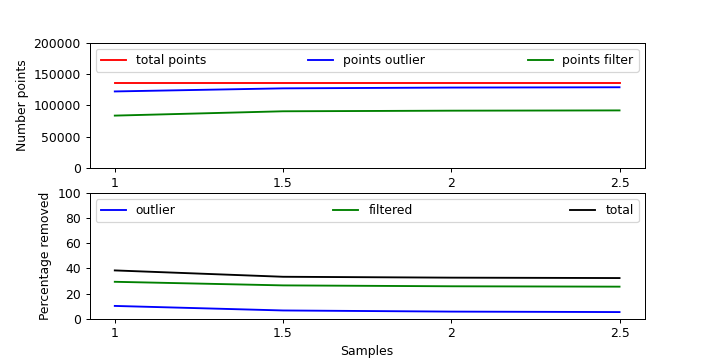

In [40]:
%matplotlib notebook
fig = plt.figure(figsize =(8,4))
ax = fig.add_subplot(211)
arr = ["1","1.5","2","2.5"]
#arr = ["0.5","1","1.5","2"]
#arr = ["0.5","1","1.5","2"]
ax.plot(mean_points_input, color='r', label="total points")
ax.plot(mean_point_out_outlier, color='b', label="points outlier")
ax.plot(mean_point_out_filter, color='g', label="points filter")
ax.set_ylabel("Number points")
ax.set_ylim([0,200000])
ax.legend(mode = "expand", ncol = 3)
plt.xticks([0, 1, 2, 3], arr)

ax2 = fig.add_subplot(212)
ax2.plot(percentage_out_outliers, color='b', label="outlier")
ax2.plot(percentage_out_filters, color='g', label="filtered")
ax2.plot(percentage_out_total, color='black', label="total")
ax2.legend(mode = "expand", ncol = 3)
ax2.set_ylim([0,100])
plt.xticks([0, 1, 2, 3], arr)
ax2.set_xlabel("Samples")
ax2.set_ylabel("Percentage removed")

plt.show()
fig.savefig("./figs/number_points_removed_distance-f-n-10-10-1.jpg")
#fig.savefig("./figs/number_points_removed_angle-f-10-n-n-1.jpg")
#fig.savefig("./figs/number_points_removed_time_split-f-2-1-1-n.jpg")